In [1]:
import sys
import scipy.io as sio
sys.path.append("../src")
import TopologicalAdvection as TA
#import TopologicalAdvection as TA

In [2]:

FDsizes = [100,100] #the Fundamental Domain goes from 0 to FDsizes[0] in the x direction, and 0 to FDsizes[1] in the y direction
#One inportant thing to note is that we need to have all of our trajectories lie in a fundamental domain who's lower left corner is (0,0).

traj = []
file = open("ensemble2.txt","r")
tempSlice = []
for line in file:
    if line == "\n":
        traj.append(tempSlice)
        tempSlice = []
    else:
        vals = line.split()
        tempSlice.append([float(vals[0]),float(vals[1])])
    


In [3]:
tri = TA.triangulation2D(traj[0],FDsizes)
triInit = TA.triangulation2D(traj[0],FDsizes)
for i in range(1,len(traj)):  #loop over all the time slices
    tri.Evolve(traj[i])
    tri.MakeDelaunay()

In [4]:
#test loop initialization

loop1 = TA.Loop(triInit, rbands = [[0,1]], curves = None, Shear = False, mesh = False)
loop2 = TA.Loop(triInit, rbands = None, curves = [[[[10,10],[50,10],[50,50],[10,50]],True]], Shear = False, mesh = False)
loop3 = TA.Loop(triInit, rbands = None, curves = [[[[10,10],[50,10],[50,50],[10,50]],True]], Shear = True, mesh = False)
loop4 = TA.Loop(triInit, rbands = None, curves = None, Shear = True, mesh = True)

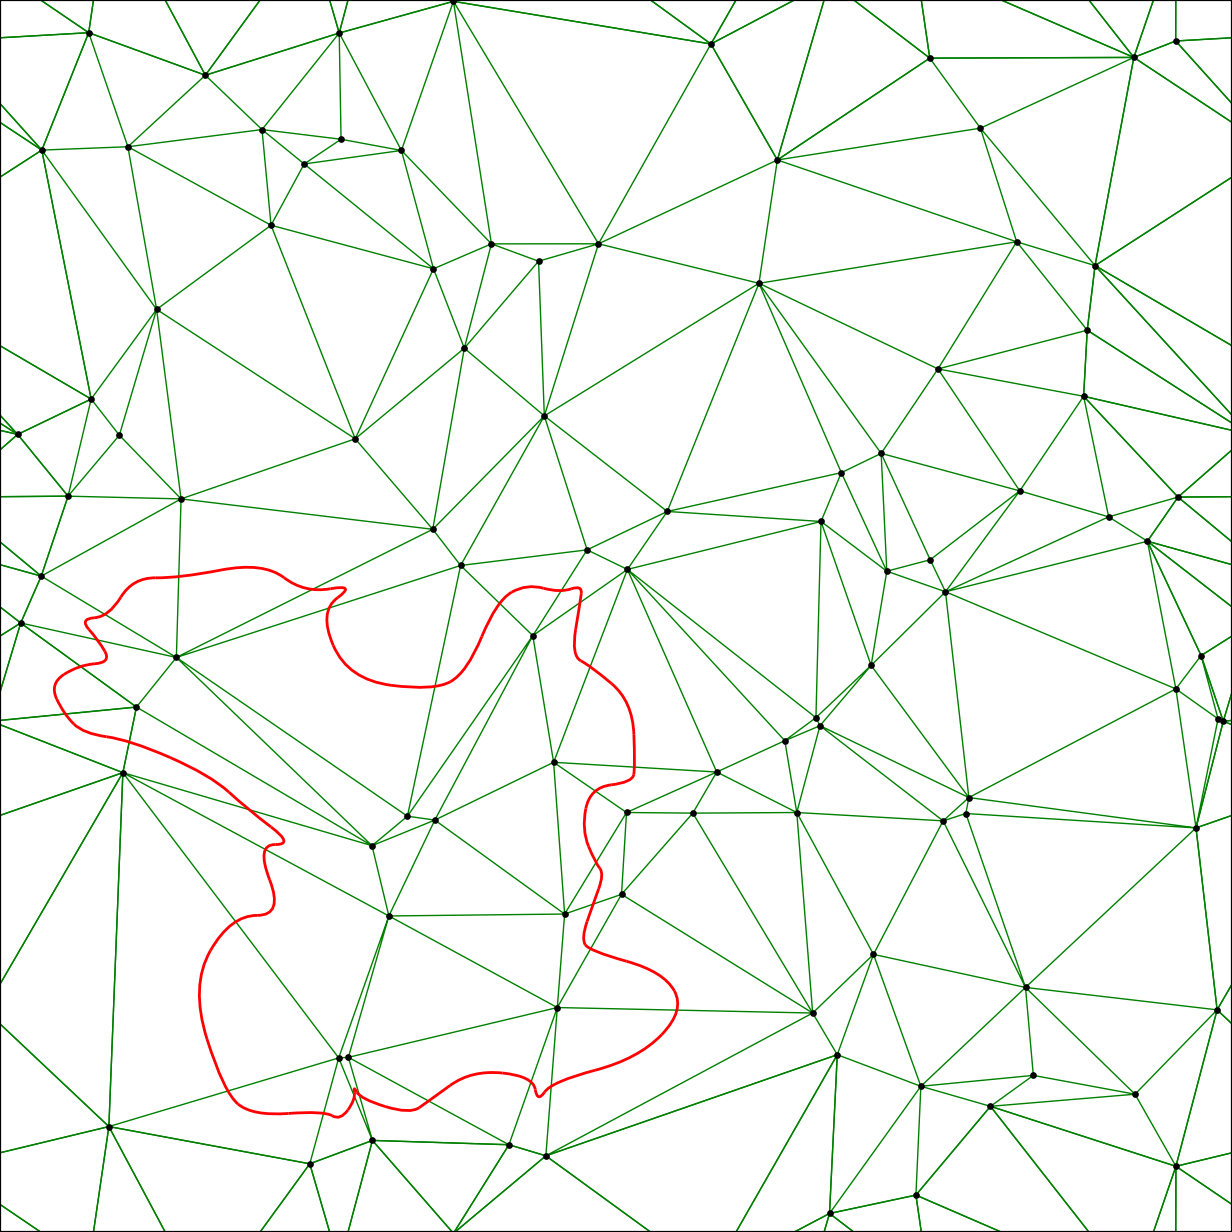

In [7]:

triInit.Plot(loop2)


In [8]:
tri.OperatorAction(loop1, index = None, Reverse = False, option = 3)
tri.OperatorAction(loop2, index = None, Reverse = False, option = 1)
tri.OperatorAction(loop3, index = None, Reverse = False, option = 2)
tri.OperatorAction(loop4, index = None, Reverse = False, option = 1)

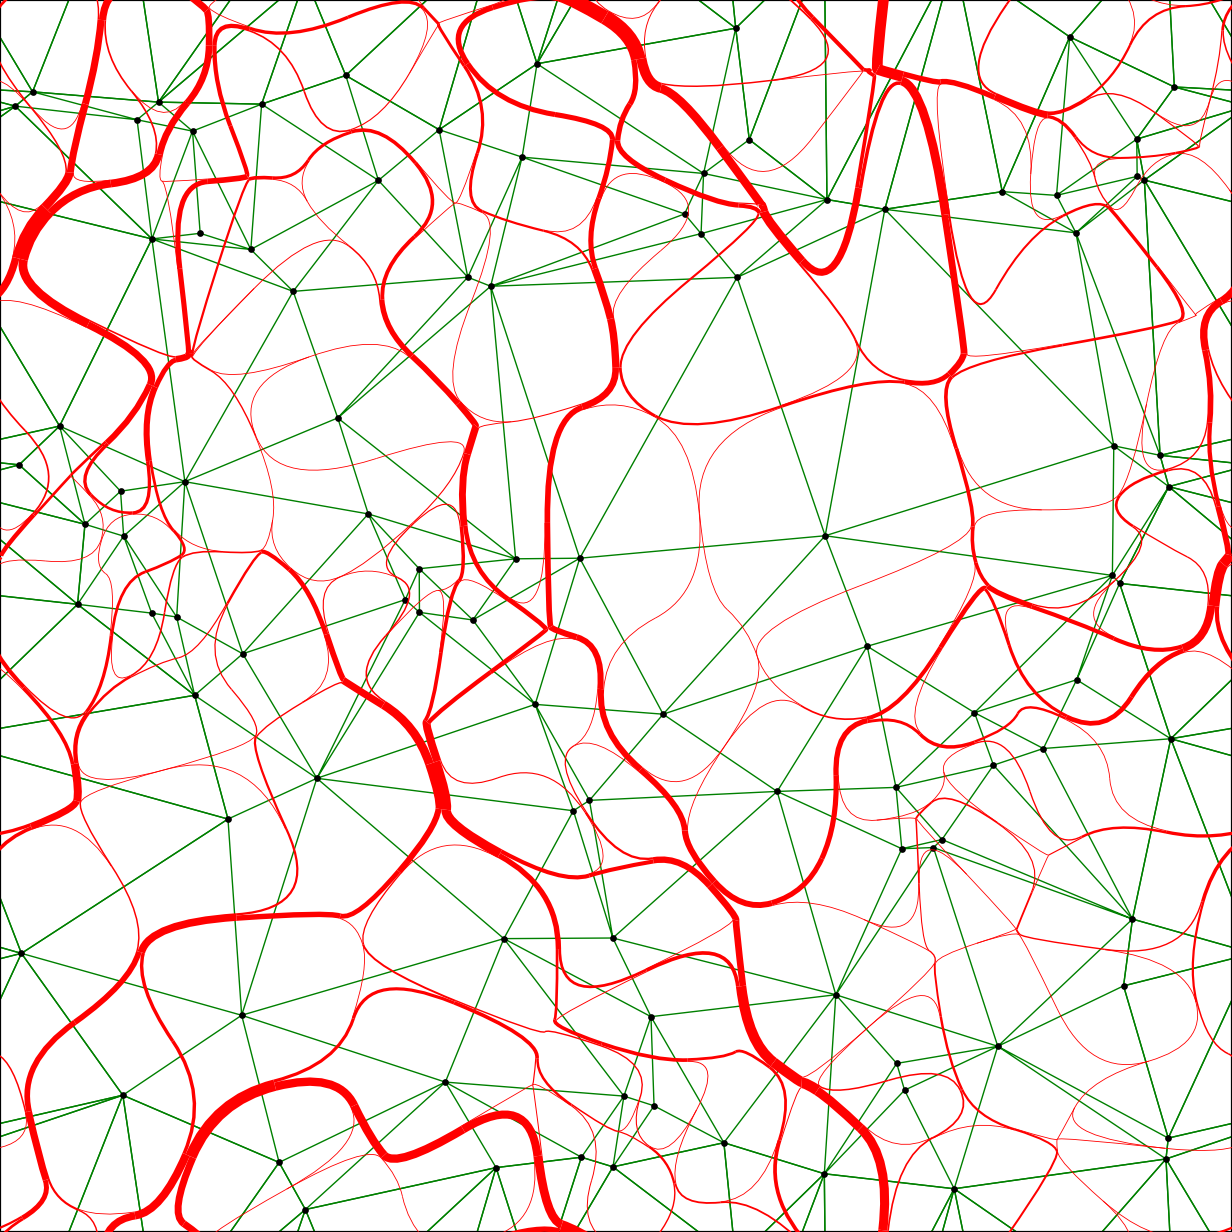

In [15]:
PP = TA.PrintParameters(Delaunay = True, experimental = True , linewidth_tt = 6, frac = 0.99, color_weights = False, log_color = False)
tri.Plot(loop2,PP)